## Importing Libraries

In [2]:
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Set display options
pd.set_option('display.max_rows', 100)  # Max rows to display
pd.set_option('display.max_columns', 40)  # Max columns to display

In [3]:
df = pd.read_csv(r'Data/AviationData.csv',encoding='windows-1252',low_memory=False)

In [4]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

## getting column data type

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

## Calculating the percentage of missing data


In [6]:
percentage_missing = (df.isna().sum()/len(df)*100).round(2)
percentage_missing

Event.Id                   0.00
Investigation.Type         0.00
Accident.Number            0.00
Event.Date                 0.00
Location                   0.06
Country                    0.25
Latitude                  61.32
Longitude                 61.33
Airport.Code              43.60
Airport.Name              40.71
Injury.Severity            1.12
Aircraft.damage            3.59
Aircraft.Category         63.68
Registration.Number        1.55
Make                       0.07
Model                      0.10
Amateur.Built              0.11
Number.of.Engines          6.84
Engine.Type                7.98
FAR.Description           63.97
Schedule                  85.85
Purpose.of.flight          6.97
Air.carrier               81.27
Total.Fatal.Injuries      12.83
Total.Serious.Injuries    14.07
Total.Minor.Injuries      13.42
Total.Uninjured            6.65
Weather.Condition          5.05
Broad.phase.of.flight     30.56
Report.Status              7.18
Publication.Date          15.49
dtype: f

In [7]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## retreiving only relevant column to the Project .

In [8]:
relevant_columns=[
    'Event.Date', 'Location', 'Country',
    'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category',
    'Make', 'Model', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
    'Total.Minor.Injuries','Number.of.Engines','Engine.Type' , 'Total.Uninjured', 'Weather.Condition',
    'Broad.phase.of.flight'
]

In [9]:
df = df[relevant_columns]

In [10]:
df.head()

,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Number.of.Engines,Engine.Type,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,2.0,0.0,0.0,1.0,Reciprocating,0.0,UNK,Cruise
1,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,4.0,0.0,0.0,1.0,Reciprocating,0.0,UNK,Unknown
2,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,172M,3.0,NaN,NaN,1.0,Reciprocating,NaN,IMC,Cruise
3,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,2.0,0.0,0.0,1.0,Reciprocating,0.0,IMC,Cruise
4,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,501,1.0,2.0,NaN,NaN,NaN,0.0,VMC,Approach


### rechecking missing value percentage in relevant columns

In [11]:
def percentage_missing (df):
    percentages=[]
    percentages= (df.isna().sum()/len(df)*100).round(2)
    return percentages
percentage_missing(df)

Event.Date                 0.00
Location                   0.06
Country                    0.25
Injury.Severity            1.12
Aircraft.damage            3.59
Aircraft.Category         63.68
Make                       0.07
Model                      0.10
Total.Fatal.Injuries      12.83
Total.Serious.Injuries    14.07
Total.Minor.Injuries      13.42
Number.of.Engines          6.84
Engine.Type                7.98
Total.Uninjured            6.65
Weather.Condition          5.05
Broad.phase.of.flight     30.56
dtype: float64

## Normalizing data

### Deleting data before 1982.As much of the data is missing.

In [12]:

df = df.drop(index=list(df[df['Event.Date']<'1985'].index.values.tolist())).reset_index(drop=True)

### Dropping all null values for columns with missing value percentage less than 10

In [13]:
df.dropna(subset=['Make','Model'],inplace=True)

In [14]:
df['Model'].unique

<bound method Series.unique of 0          PA-34-200T
1                310N
2             727-225
3        LM-1 "NIKKO"
4                150J
             ...     
78271       PA-28-151
78272            7ECA
78273           8GCBC
78274            210N
78275       PA-24-260
Name: Model, Length: 78185, dtype: object>

### Normalizing text in Model  column.
we  normalize text by converting it to uppercase,stripping leading and trailing whitespace, and  removing punctuation .

In [15]:
# Convert "Model" column to lowercase
df['Model'] = df['Model'].str.upper()

# Remove leading and trailing whitespaces
df['Model'] = df['Model'].str.strip()

# Replace multiple whitespaces with a single whitespace
df['Model'] = df['Model'].str.replace('-', '', regex=True)



In [16]:
df['Make'].unique

<bound method Series.unique of 0                             Piper
1                            Cessna
2                            Boeing
3                              Fuji
4                            Cessna
                    ...            
78271                         PIPER
78272                      BELLANCA
78273    AMERICAN CHAMPION AIRCRAFT
78274                        CESSNA
78275                         PIPER
Name: Make, Length: 78185, dtype: object>

### Normalizing text in make  column.
define a function to normalize text by converting it to lowercase, removing punctuation, and stripping leading and trailing whitespace. We then apply this normalization to the 'Make' column in the dataset.

In [17]:
# Define a function to normalize text
def normalize_text(text):
    # Convert to lowercase
    text = text.title()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Strip leading and trailing whitespace
    text = text.strip()
    return text

# Create a new column for the normalized values
df['Make'] = df['Make'].apply(normalize_text)

In [18]:
df.isnull().sum()

Event.Date                    0
Location                     48
Country                     179
Injury.Severity             979
Aircraft.damage            2964
Aircraft.Category         49504
Make                          0
Model                         0
Total.Fatal.Injuries      11334
Total.Serious.Injuries    12427
Total.Minor.Injuries      11848
Number.of.Engines          5916
Engine.Type                7023
Total.Uninjured            5871
Weather.Condition          4438
Broad.phase.of.flight     27082
dtype: int64

In [19]:
df.shape
percentage_missing(df)

Event.Date                 0.00
Location                   0.06
Country                    0.23
Injury.Severity            1.25
Aircraft.damage            3.79
Aircraft.Category         63.32
Make                       0.00
Model                      0.00
Total.Fatal.Injuries      14.50
Total.Serious.Injuries    15.89
Total.Minor.Injuries      15.15
Number.of.Engines          7.57
Engine.Type                8.98
Total.Uninjured            7.51
Weather.Condition          5.68
Broad.phase.of.flight     34.64
dtype: float64

#### Applying it to the dataframe's Aircraft category column.

In [20]:
df.head()

,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Number.of.Engines,Engine.Type,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,1985-01-01,"HOPKINTON, NH",United States,Non-Fatal,Destroyed,NaN,Piper,PA34200T,0.0,2.0,0.0,2.0,Reciprocating,0.0,IMC,Approach
1,1985-01-01,"EDGEWOOD, NM",United States,Fatal(2),Destroyed,NaN,Cessna,310N,2.0,0.0,0.0,2.0,Reciprocating,0.0,IMC,Cruise
2,1985-01-01,"LA PAZ, Bolivia",Bolivia,Fatal(29),Destroyed,NaN,Boeing,727225,29.0,0.0,0.0,3.0,Turbo Fan,0.0,UNK,NaN
3,1985-01-01,"ODESSA, FL",United States,Non-Fatal,Substantial,NaN,Fuji,"LM1 ""NIKKO""",0.0,2.0,2.0,1.0,Reciprocating,0.0,VMC,Maneuvering
4,1985-01-01,"DUBLIN, NC",United States,Non-Fatal,Substantial,NaN,Cessna,150J,0.0,0.0,0.0,1.0,Reciprocating,1.0,VMC,Cruise


In [21]:
df.columns

Index(['Event.Date', 'Location', 'Country', 'Injury.Severity',
       'Aircraft.damage', 'Aircraft.Category', 'Make', 'Model',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Number.of.Engines', 'Engine.Type',
       'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight'],
      dtype='object')

In [22]:
df.dropna(subset=['Location', 'Country', 'Injury.Severity'],inplace=True)

In [23]:
percentage_missing(df)

Event.Date                 0.00
Location                   0.00
Country                    0.00
Injury.Severity            0.00
Aircraft.damage            3.18
Aircraft.Category         63.90
Make                       0.00
Model                      0.00
Total.Fatal.Injuries      14.69
Total.Serious.Injuries    16.11
Total.Minor.Injuries      15.36
Number.of.Engines          6.73
Engine.Type                8.09
Total.Uninjured            7.60
Weather.Condition          4.59
Broad.phase.of.flight     33.85
dtype: float64

### Processing Injury Severity Data
well extract the number of fatal injuries and clean up the severity descriptions in the dataset.The number of fatal injuries is added to a new column and simplifies the severity descriptions by removing the fatality numbers from the Injury.Severity column.
#### Steps:
1. Define a function to extract the number of fatal injuries from the severity description.
2. Apply the function to create a new column for extracted fatal injuries.
3. Define a function to simplify the severity description by removing the fatality number.
4. Apply the function to clean the Injury.Severity column.


In [24]:
# import re module .This module provides regular expression matching operations
import re

def extract_fatalities(severity, total_fatal_injuries):
    match = re.search(r'Fatal\((\d+)\)', severity)
    if match:
        return int(match.group(1))
    else:
        return total_fatal_injuries

# Applying the function to create a new column for extracted fatalities
df['Total.Fatal.Injuries'] = df.apply(lambda row: extract_fatalities(row['Injury.Severity'], row['Total.Fatal.Injuries']), axis=1)

# Function to remove the fatality number from the Injury.Severity column
def simplify_severity(severity):
    return re.sub(r'\(.*\)', '', severity).strip()

# Applying the function to clean the Injury.Severity column
df['Injury.Severity'] = df['Injury.Severity'].apply(simplify_severity)

#### Imputing weather condition , aircraft damage anull values with  mode 

The code fills missing values in the 'Weather.Condition' and 'Aircraft.damage' columns with the most common value. It then converts the 'Weather.Condition' values to uppercase for consistency.

In [25]:
df['Weather.Condition'].fillna(df['Weather.Condition'].mode()[0], inplace=True)
df['Aircraft.damage'].fillna(df['Aircraft.damage'].mode()[0], inplace=True)
df['Weather.Condition']=df['Weather.Condition'].str.upper()

### Handling Missing Values in Aircraft Data
Missing values in various columns related to aircraft injuries, engines, engine type, and flight phase are filled using the mode of the respective columns within the same 'Make' and 'Model' groups. This approach ensures that missing data is imputed with the most common values specific to each aircraft make and model.

#### Steps:
1. Impute missing values for 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Number.of.Engines', 'Engine.Type', 'Aircraft.Category', and 'Broad.phase.of.flight'.
2. Group the data by 'Make' and 'Model' to calculate the mode for each column within these groups.
3. Fill missing values in each column with the mode value corresponding to the respective 'Make' and 'Model' combination.


In [26]:
df['Total.Fatal.Injuries'] = df.groupby(['Make', 'Model'])['Total.Fatal.Injuries'].transform(lambda x: x.fillna(x.mode().max()))
df['Total.Serious.Injuries'] = df.groupby(['Make', 'Model'])['Total.Serious.Injuries'].transform(lambda x: x.fillna(x.mode().max()))
df['Total.Minor.Injuries'] = df.groupby(['Make', 'Model'])['Total.Minor.Injuries'].transform(lambda x: x.fillna(x.mode().max()))
df['Total.Uninjured']= df.groupby(['Make', 'Model'])['Total.Uninjured'].transform(lambda x: x.fillna(x.mode().max()))
df['Number.of.Engines'] = df.groupby(['Make', 'Model'])['Number.of.Engines'].transform(lambda x: x.fillna(x.mode().max()))
df['Engine.Type'] = df.groupby(['Make', 'Model'])['Engine.Type'].transform(lambda x: x.fillna(x.mode().max()))
df['Aircraft.Category'] = df.groupby(['Make'])['Aircraft.Category'].transform(lambda x: x.fillna(x.mode().max()))
df['Broad.phase.of.flight'] = df.groupby(['Make', 'Model'])['Broad.phase.of.flight'].transform(lambda x: x.fillna(x.mode().max()))



In [27]:
percentage_missing (df)

Event.Date                 0.00
Location                   0.00
Country                    0.00
Injury.Severity            0.00
Aircraft.damage            0.00
Aircraft.Category          4.99
Make                       0.00
Model                      0.00
Total.Fatal.Injuries       2.57
Total.Serious.Injuries     2.88
Total.Minor.Injuries       2.87
Number.of.Engines          1.58
Engine.Type                1.92
Total.Uninjured            1.76
Weather.Condition          0.00
Broad.phase.of.flight     11.01
dtype: float64

In [28]:
df.head(5)

,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Number.of.Engines,Engine.Type,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,1985-01-01,"HOPKINTON, NH",United States,Non-Fatal,Destroyed,Airplane,Piper,PA34200T,0.0,2.0,0.0,2.0,Reciprocating,0.0,IMC,Approach
1,1985-01-01,"EDGEWOOD, NM",United States,Fatal,Destroyed,Airplane,Cessna,310N,2.0,0.0,0.0,2.0,Reciprocating,0.0,IMC,Cruise
2,1985-01-01,"LA PAZ, Bolivia",Bolivia,Fatal,Destroyed,Airplane,Boeing,727225,29.0,0.0,0.0,3.0,Turbo Fan,0.0,UNK,Cruise
3,1985-01-01,"ODESSA, FL",United States,Non-Fatal,Substantial,Airplane,Fuji,"LM1 ""NIKKO""",0.0,2.0,2.0,1.0,Reciprocating,0.0,VMC,Maneuvering
4,1985-01-01,"DUBLIN, NC",United States,Non-Fatal,Substantial,Airplane,Cessna,150J,0.0,0.0,0.0,1.0,Reciprocating,1.0,VMC,Cruise


In [29]:
percentage_missing(df)

Event.Date                 0.00
Location                   0.00
Country                    0.00
Injury.Severity            0.00
Aircraft.damage            0.00
Aircraft.Category          4.99
Make                       0.00
Model                      0.00
Total.Fatal.Injuries       2.57
Total.Serious.Injuries     2.88
Total.Minor.Injuries       2.87
Number.of.Engines          1.58
Engine.Type                1.92
Total.Uninjured            1.76
Weather.Condition          0.00
Broad.phase.of.flight     11.01
dtype: float64

#### Imputing  the rest with  mode.


In [30]:
df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].fillna(df['Total.Serious.Injuries'].mode()[0])
df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].fillna(df['Total.Minor.Injuries'].mode()[0])
df['Number.of.Engines'] = df['Number.of.Engines'].fillna(df['Number.of.Engines'].mode()[0])
df['Total.Uninjured'] = df['Total.Uninjured'].fillna(df['Total.Uninjured'].mode()[0])



In [31]:
percentage_missing(df)

Event.Date                 0.00
Location                   0.00
Country                    0.00
Injury.Severity            0.00
Aircraft.damage            0.00
Aircraft.Category          4.99
Make                       0.00
Model                      0.00
Total.Fatal.Injuries       2.57
Total.Serious.Injuries     0.00
Total.Minor.Injuries       0.00
Number.of.Engines          0.00
Engine.Type                1.92
Total.Uninjured            0.00
Weather.Condition          0.00
Broad.phase.of.flight     11.01
dtype: float64

### Normalization of the Injury severity by extracting the  casualties to the right column(Total.Fatatl.Injuries)

#### droppping remaining null containing rows

In [32]:
df = df.dropna(subset=['Total.Fatal.Injuries', 'Engine.Type'])

In [33]:
percentage_missing(df)

Event.Date                0.00
Location                  0.00
Country                   0.00
Injury.Severity           0.00
Aircraft.damage           0.00
Aircraft.Category         4.30
Make                      0.00
Model                     0.00
Total.Fatal.Injuries      0.00
Total.Serious.Injuries    0.00
Total.Minor.Injuries      0.00
Number.of.Engines         0.00
Engine.Type               0.00
Total.Uninjured           0.00
Weather.Condition         0.00
Broad.phase.of.flight     9.76
dtype: float64

In [34]:
df.head()

,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Number.of.Engines,Engine.Type,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,1985-01-01,"HOPKINTON, NH",United States,Non-Fatal,Destroyed,Airplane,Piper,PA34200T,0.0,2.0,0.0,2.0,Reciprocating,0.0,IMC,Approach
1,1985-01-01,"EDGEWOOD, NM",United States,Fatal,Destroyed,Airplane,Cessna,310N,2.0,0.0,0.0,2.0,Reciprocating,0.0,IMC,Cruise
2,1985-01-01,"LA PAZ, Bolivia",Bolivia,Fatal,Destroyed,Airplane,Boeing,727225,29.0,0.0,0.0,3.0,Turbo Fan,0.0,UNK,Cruise
3,1985-01-01,"ODESSA, FL",United States,Non-Fatal,Substantial,Airplane,Fuji,"LM1 ""NIKKO""",0.0,2.0,2.0,1.0,Reciprocating,0.0,VMC,Maneuvering
4,1985-01-01,"DUBLIN, NC",United States,Non-Fatal,Substantial,Airplane,Cessna,150J,0.0,0.0,0.0,1.0,Reciprocating,1.0,VMC,Cruise


In [35]:
df['Event.Date']= pd.to_datetime(df['Event.Date'],format='%Y-%m-%d')
df['Year']=df['Event.Date'].dt.year
df['Month']=df['Event.Date'].dt.month
df['Day']=df['Event.Date'].dt.day

df.head()


,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Number.of.Engines,Engine.Type,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Year,Month,Day
0,1985-01-01,"HOPKINTON, NH",United States,Non-Fatal,Destroyed,Airplane,Piper,PA34200T,0.0,2.0,0.0,2.0,Reciprocating,0.0,IMC,Approach,1985,1,1
1,1985-01-01,"EDGEWOOD, NM",United States,Fatal,Destroyed,Airplane,Cessna,310N,2.0,0.0,0.0,2.0,Reciprocating,0.0,IMC,Cruise,1985,1,1
2,1985-01-01,"LA PAZ, Bolivia",Bolivia,Fatal,Destroyed,Airplane,Boeing,727225,29.0,0.0,0.0,3.0,Turbo Fan,0.0,UNK,Cruise,1985,1,1
3,1985-01-01,"ODESSA, FL",United States,Non-Fatal,Substantial,Airplane,Fuji,"LM1 ""NIKKO""",0.0,2.0,2.0,1.0,Reciprocating,0.0,VMC,Maneuvering,1985,1,1
4,1985-01-01,"DUBLIN, NC",United States,Non-Fatal,Substantial,Airplane,Cessna,150J,0.0,0.0,0.0,1.0,Reciprocating,1.0,VMC,Cruise,1985,1,1


#### Calculate New columns to be used in the visualizations:

In [36]:
df['Total.Injuries'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries']
df['Injury.Severity.Index'] = df['Total.Fatal.Injuries']*3 + df['Total.Serious.Injuries']*2 + df['Total.Minor.Injuries']


In [37]:
df.sort_values(by='Event.Date').head(20)

,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Number.of.Engines,Engine.Type,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Year,Month,Day,Total.Injuries,Injury.Severity.Index
0,1985-01-01,"HOPKINTON, NH",United States,Non-Fatal,Destroyed,Airplane,Piper,PA34200T,0.0,2.0,0.0,2.0,Reciprocating,0.0,IMC,Approach,1985,1,1,2.0,4.0
1,1985-01-01,"EDGEWOOD, NM",United States,Fatal,Destroyed,Airplane,Cessna,310N,2.0,0.0,0.0,2.0,Reciprocating,0.0,IMC,Cruise,1985,1,1,2.0,6.0
2,1985-01-01,"LA PAZ, Bolivia",Bolivia,Fatal,Destroyed,Airplane,Boeing,727225,29.0,0.0,0.0,3.0,Turbo Fan,0.0,UNK,Cruise,1985,1,1,29.0,87.0
3,1985-01-01,"ODESSA, FL",United States,Non-Fatal,Substantial,Airplane,Fuji,"LM1 ""NIKKO""",0.0,2.0,2.0,1.0,Reciprocating,0.0,VMC,Maneuvering,1985,1,1,4.0,6.0
4,1985-01-01,"DUBLIN, NC",United States,Non-Fatal,Substantial,Airplane,Cessna,150J,0.0,0.0,0.0,1.0,Reciprocating,1.0,VMC,Cruise,1985,1,1,0.0,0.0
5,1985-01-02,"PAWNEE CITY, NE",United States,Fatal,Substantial,Airplane,Cessna,150F,1.0,1.0,0.0,1.0,Reciprocating,0.0,VMC,Maneuvering,1985,1,2,2.0,5.0
6,1985-01-02,"LORDSBURG, NM",United States,Non-Fatal,Substantial,Airplane,Cessna,210B,0.0,0.0,5.0,1.0,Reciprocating,0.0,VMC,Cruise,1985,1,2,5.0,5.0
7,1985-01-02,"YODER, CO",United States,Non-Fatal,Substantial,Airplane,Piper,PA28181,0.0,0.0,0.0,1.0,Reciprocating,3.0,VMC,Cruise,1985,1,2,0.0,0.0
8,1985-01-02,"MT STERLING, IL",United States,Non-Fatal,Substantial,Airplane,Cessna,172M,0.0,0.0,0.0,1.0,Reciprocating,5.0,VMC,Landing,1985,1,2,0.0,0.0
9,1985-01-03,"SALT LAKE CITY, UT",United States,Non-Fatal,Destroyed,Helicopter,Aerospatiale,SA315B,0.0,0.0,1.0,1.0,Turbo Shaft,0.0,VMC,Maneuvering,1985,1,3,1.0,1.0


In [38]:
percentage_missing(df)

Event.Date                0.00
Location                  0.00
Country                   0.00
Injury.Severity           0.00
Aircraft.damage           0.00
Aircraft.Category         4.30
Make                      0.00
Model                     0.00
Total.Fatal.Injuries      0.00
Total.Serious.Injuries    0.00
Total.Minor.Injuries      0.00
Number.of.Engines         0.00
Engine.Type               0.00
Total.Uninjured           0.00
Weather.Condition         0.00
Broad.phase.of.flight     9.76
Year                      0.00
Month                     0.00
Day                       0.00
Total.Injuries            0.00
Injury.Severity.Index     0.00
dtype: float64

In [39]:
df['Aircraft.Category'] = df.groupby(['Make','Model'])['Aircraft.Category'].bfill()
df['Broad.phase.of.flight'] = df.groupby(['Make','Model'])['Broad.phase.of.flight'].bfill()

In [40]:
df['Broad.phase.of.flight']=df['Broad.phase.of.flight'].fillna('Unknown')
df.dropna(subset=['Aircraft.Category'],axis=0 , inplace=True)

In [41]:
percentage_missing(df)

Event.Date                0.0
Location                  0.0
Country                   0.0
Injury.Severity           0.0
Aircraft.damage           0.0
Aircraft.Category         0.0
Make                      0.0
Model                     0.0
Total.Fatal.Injuries      0.0
Total.Serious.Injuries    0.0
Total.Minor.Injuries      0.0
Number.of.Engines         0.0
Engine.Type               0.0
Total.Uninjured           0.0
Weather.Condition         0.0
Broad.phase.of.flight     0.0
Year                      0.0
Month                     0.0
Day                       0.0
Total.Injuries            0.0
Injury.Severity.Index     0.0
dtype: float64

In [42]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 70563 entries, 0 to 78275
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              70563 non-null  datetime64[ns]
 1   Location                70563 non-null  object        
 2   Country                 70563 non-null  object        
 3   Injury.Severity         70563 non-null  object        
 4   Aircraft.damage         70563 non-null  object        
 5   Aircraft.Category       70563 non-null  object        
 6   Make                    70563 non-null  object        
 7   Model                   70563 non-null  object        
 8   Total.Fatal.Injuries    70563 non-null  float64       
 9   Total.Serious.Injuries  70563 non-null  float64       
 10  Total.Minor.Injuries    70563 non-null  float64       
 11  Number.of.Engines       70563 non-null  float64       
 12  Engine.Type             70563 non-null  object     

### Standardizing Identifiers in Airplane Data
In the code below, we are standardizing the identifiers for 'Make' and 'Model' columns in the airplane data CSV file using fuzzy matching. This process aims to ensure consistency and accuracy in the identification of aircraft makes and models.

#### Steps:
1. Load the airplane data CSV file.
2. Define functions to standardize 'Make' and 'Model' identifiers using fuzzy matching.
3. Generate standard dictionaries for 'Make' and 'Model'.
4. Update the 'Make' and 'Model' columns with the standardized identifiers.

Let's proceed with the standardization process:


In [43]:
import pandas as pd
from fuzzywuzzy import process

# Load the airplane data CSV file
df_airplane = pd.read_csv('Data/airplane_data.csv')  # Replace 'path_to_airplane_data.csv' with the actual file path

# Function to standardize identifiers using fuzzy matching for 'Make'
def standardize_make(df):
    standard_dict_make = {}

    for make in df['Make'].unique():
        matches = process.extractOne(make, df['Make'].unique())
        standard_dict_make[make] = matches[0]

    return standard_dict_make

# Function to standardize identifiers using fuzzy matching for 'Model'
def standardize_model(df):
    standard_dict_model = {}

    for model in df['Model'].unique():
        matches = process.extractOne(model, df['Model'].unique())
        standard_dict_model[model] = matches[0]

    return standard_dict_model

# Generate the standard dictionaries for 'Make' and 'Model'
standard_dict_make = standardize_make(df_airplane)
standard_dict_model = standardize_model(df_airplane)

# Update the 'Make' and 'Model' columns with standardized identifiers
df_airplane['Make'] = df_airplane['Make'].map(standard_dict_make)
df_airplane['Model'] = df_airplane['Model'].map(standard_dict_model)

## PLOTTING

#### 1. Trend of Total Accidents Over Time
#### Objective: To analyze the trend of accidents over the years by plotting  a  Line chart
#### showing the number of accidents per year.



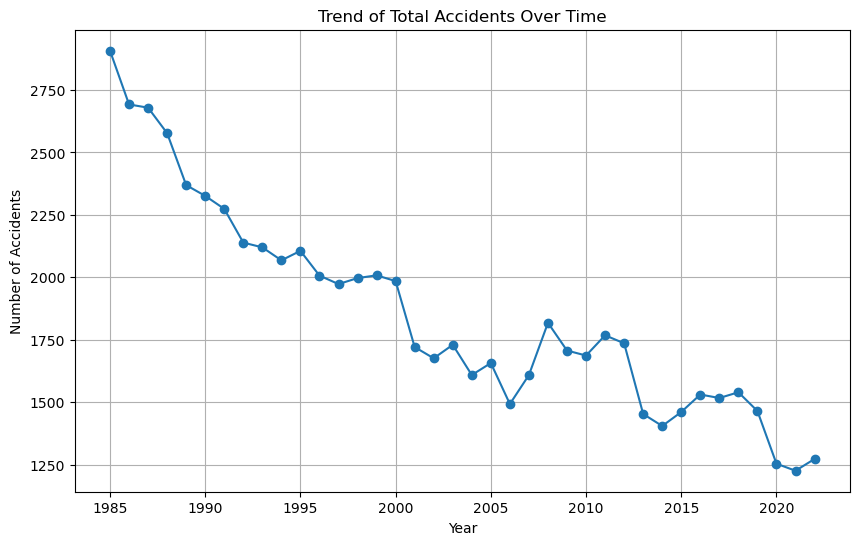

In [44]:
# Group the data by 'Year' and count the number of occurrences (accidents) for each year
df_yearly = df.groupby('Year').size()

# Create a new figure with the specified size
plt.figure(figsize=(10, 6))

# Plot the data as a line chart
# 'marker' sets the marker style for the data points
plt.plot(df_yearly.index, df_yearly.values, marker='o')

# Set the title of the plot
plt.title('Trend of Total Accidents Over Time')

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('Number of Accidents')

# Add a grid to the plot for better readability
plt.grid(True)

# Display the plot
plt.show()



### 2. Top Aircraft Makes by least Number of Accidents
**Objective:** Identify the top 10 aircraft makes (companies) by the number of accidents.


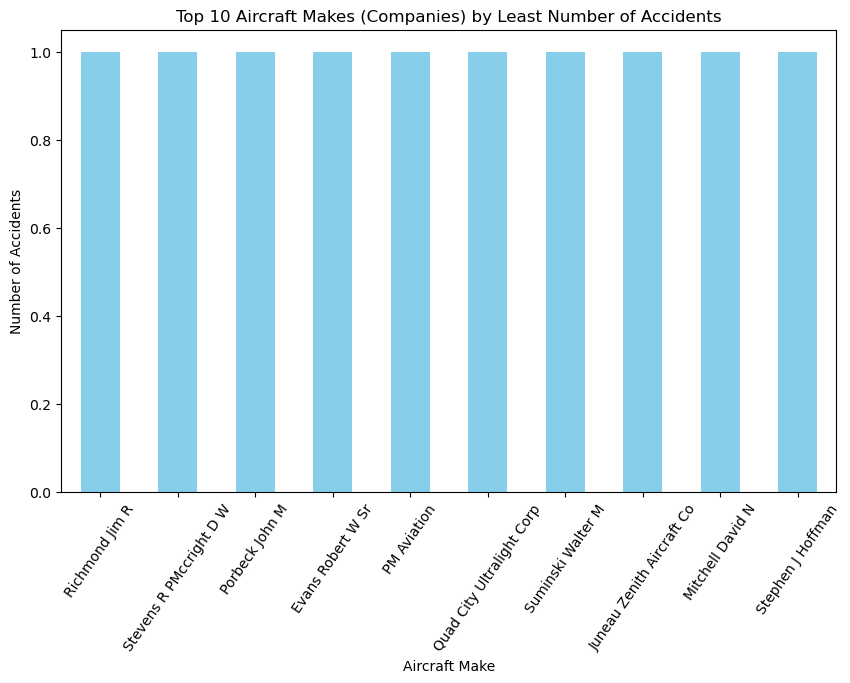

In [45]:
# Count each unique value in the 'Make' column and select the top 10 most frequent ones
df_make = df['Make'].value_counts().tail(10)

# Create a new figure of specific size
plt.figure(figsize=(10, 6))

# Plot the data as a bar chart
# 'kind' specifies the type of plot (bar plot)
# 'color' sets the color of the bars
df_make.plot(kind='bar', color='skyblue')

# Set the title of the plot
plt.title('Top 10 Aircraft Makes (Companies) by Least Number of Accidents')

# Set the x-axis label
plt.xlabel('Aircraft Make')

# Set the y-axis label
plt.ylabel('Number of Accidents')

# Rotate the x-axis labels for better readability (55 degrees)
plt.xticks(rotation=55)

# Display the plot
plt.show()




### 3. Number of Accidents Under Different Weather Conditions
**Objective:** Analyze the number of accidents under different weather conditions.


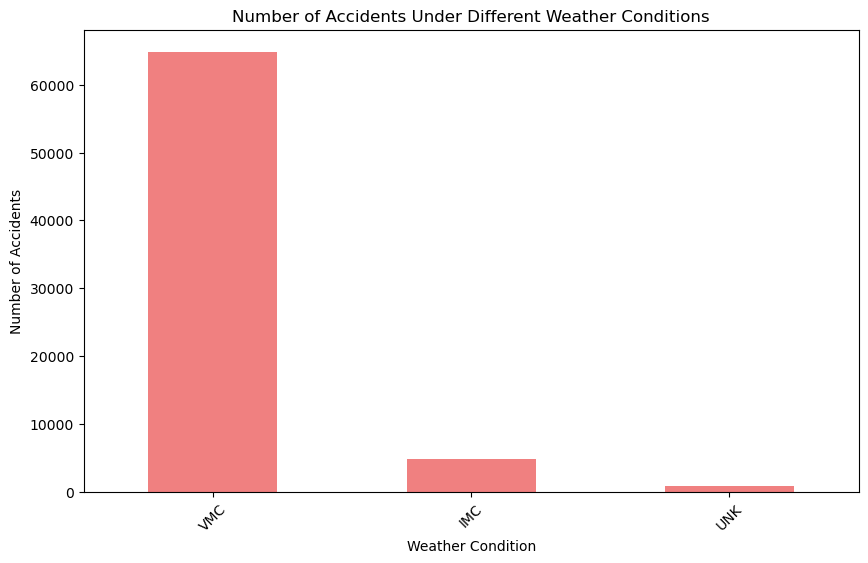

In [46]:
# Count  each unique value in the 'Weather.Condition' column
df_weather = df['Weather.Condition'].value_counts()

# figure with the specified size
plt.figure(figsize=(10, 6))

# Plot the data as a bar chart
# 'kind' specifies the type of plot (bar plot)
# 'color' sets the color of the bars
df_weather.plot(kind='bar', color='lightcoral')

# Set the title of the plot
plt.title('Number of Accidents Under Different Weather Conditions')

# Set the x-axis label
plt.xlabel('Weather Condition')

# Set the y-axis label
plt.ylabel('Number of Accidents')

# Rotate the x-axis labels for better readability (45 degrees)
plt.xticks(rotation=45)

# Display the plot
plt.show()

**Objective:** To simplify plotting.



### 4. Accidents by Injury Severity Over Time
**Objective:** Analyze the number of accidents by injury severity over time using a stacked bar chart.


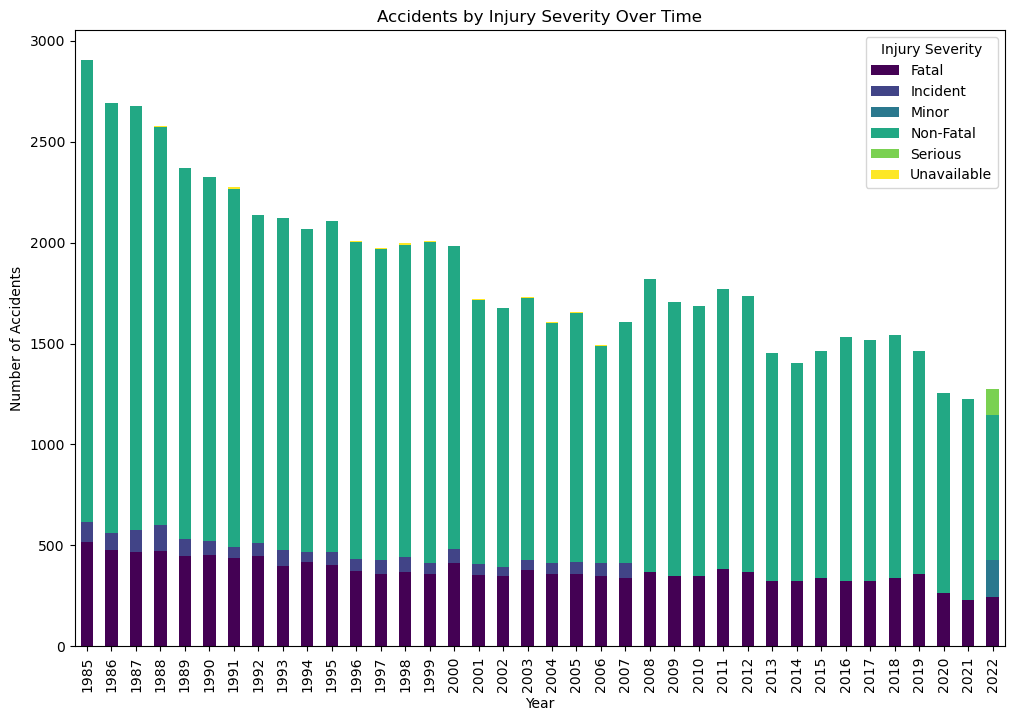

In [47]:
# Group the data by 'Year' and 'Injury.Severity', then count the occurrences
# This will give us a DataFrame with counts of each severity type for each year
df_severity = df.groupby(['Year', 'Injury.Severity']).size().unstack()

# Plot data as a stacked bar chart
# 'kind' specifies the type of plot (bar plot)
# 'stacked=True' makes the bars stacked on top of each other for each year
# 'figsize' sets the size of the figure
# 'colormap' sets the color palette for the bars
df_severity.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Set the title of the plot
plt.title('Accidents by Injury Severity Over Time')

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('Number of Accidents')

# Add a legend with the title 'Injury Severity'
plt.legend(title='Injury Severity')

# Display the plot
plt.show()




### 5. Heatmap of Accidents by Country and Year
**Objective:** Visualize the number of accidents by country and year using a heatmap.


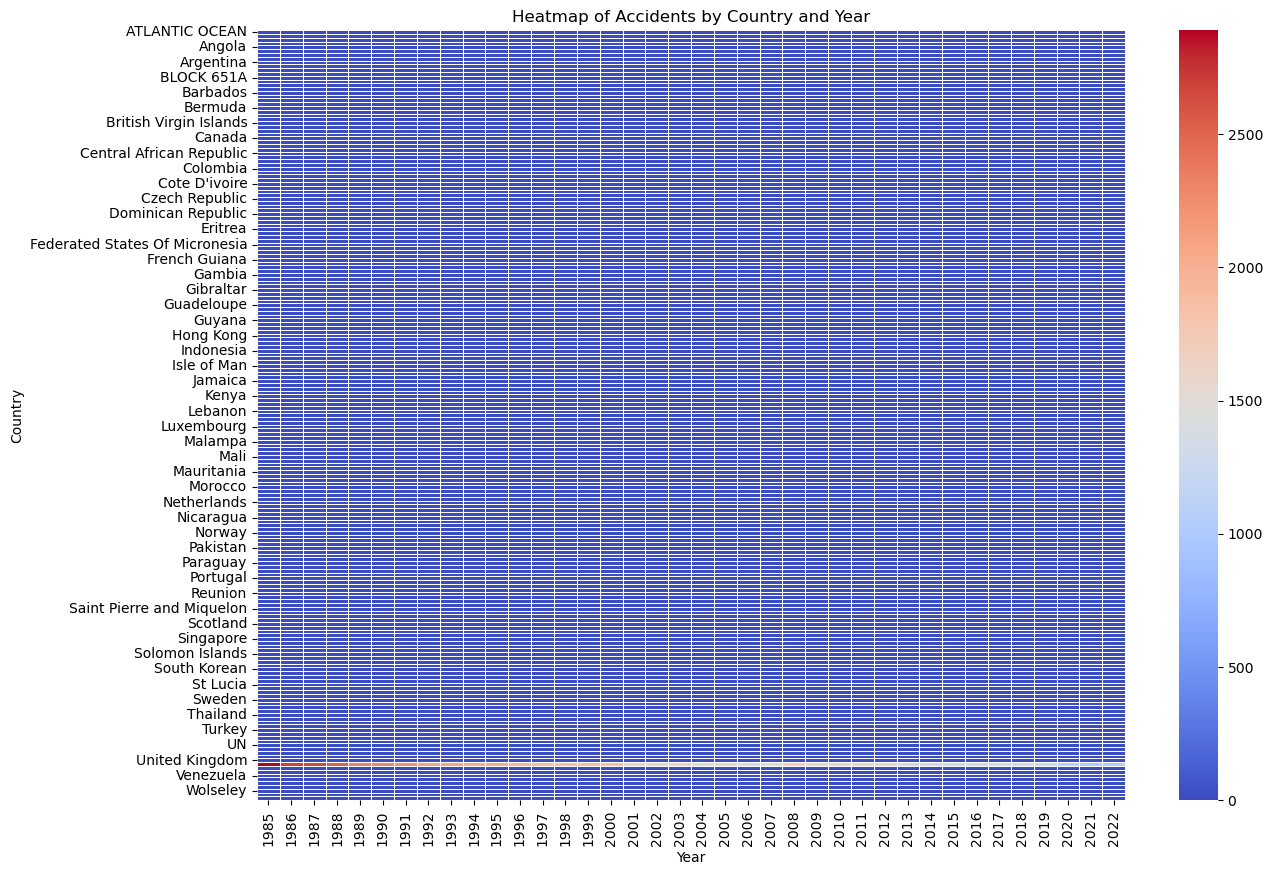

In [48]:
df_country_year = df.groupby(['Country', 'Year']).size().unstack(fill_value=0)

# Create a new figure with the specified size
plt.figure(figsize=(14, 10))

# Create a heatmap with the data
# 'cmap' specifies the color palette for the heatmap
# 'linewidths' sets the width of the lines that will divide each cell
sns.heatmap(df_country_year, cmap='coolwarm', linewidths=.5)

# Set the title of the plot
plt.title('Heatmap of Accidents by Country and Year')

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('Country')

# Display the plot
plt.show()



### 6. Fatal vs Non-Fatal Accidents by Aircraft Category
**Objective:** Compare the number of fatal and non-fatal accidents by aircraft category.


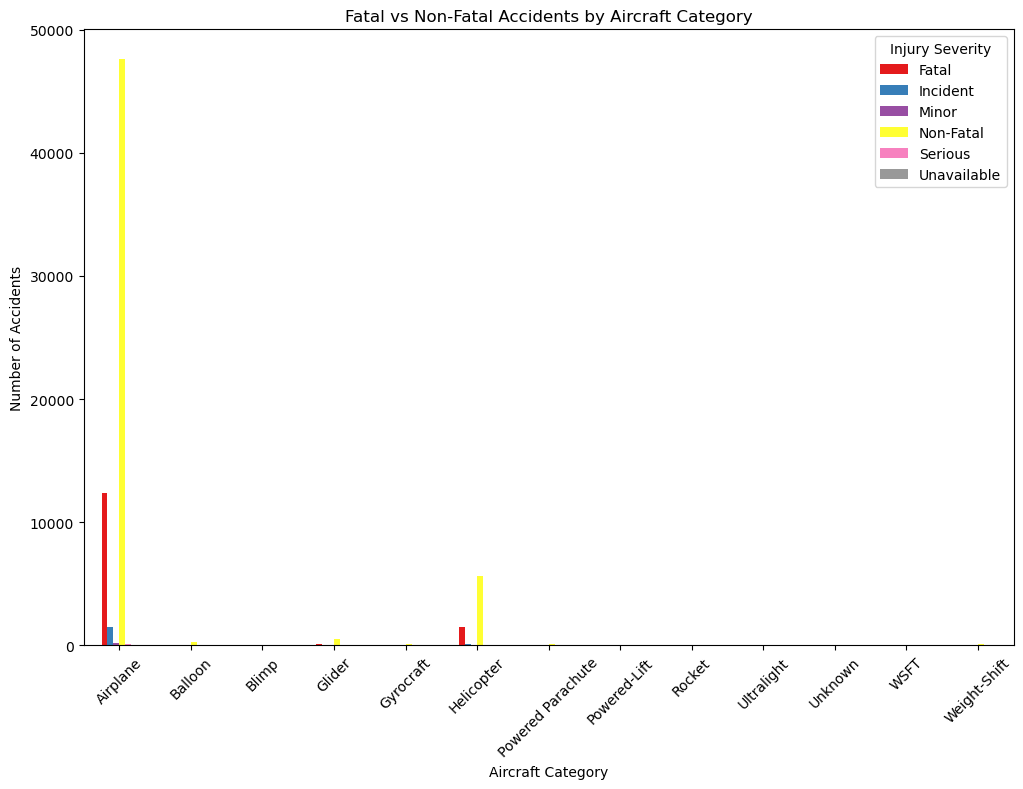

In [49]:
# Group the data by 'Aircraft.Category' and 'Injury.Severity', getting count
df_fatal_nonfatal = df.groupby(['Aircraft.Category', 'Injury.Severity']).size().unstack()

# Plot is a bar chart
# 'kind' specifies the type of plot (bar plot)
# 'figsize' sets the size of the figure
# 'colormap' sets the color palette for the bars
df_fatal_nonfatal.plot(kind='bar', figsize=(12, 8), colormap='Set1')

# Set the title of the plot
plt.title('Fatal vs Non-Fatal Accidents by Aircraft Category')

# Set the x-axis label
plt.xlabel('Aircraft Category')

# Set the y-axis label
plt.ylabel('Number of Accidents')

# Add a legend
plt.legend(title='Injury Severity')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()




### 7. Number of Accidents by Number of Engines
**Objective:** Analyze the number of accidents by the number of engines.


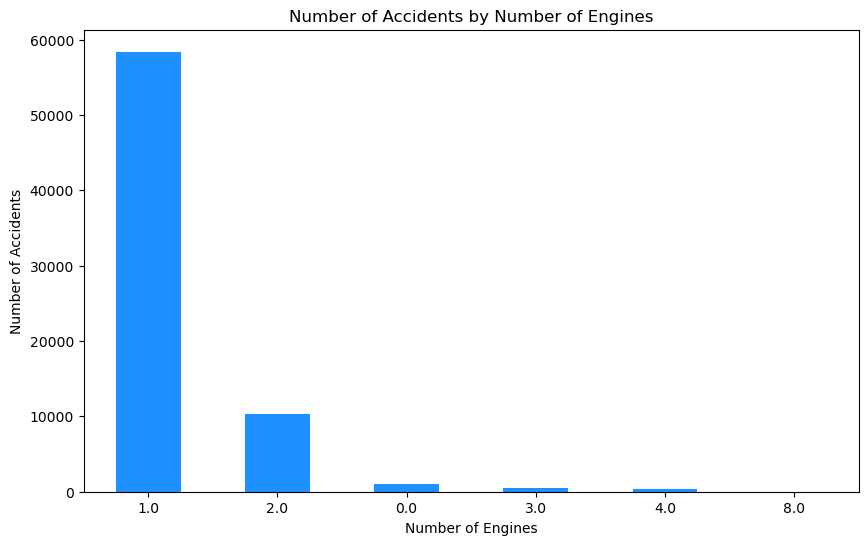

In [50]:
# Count  each unique value in the 'Number.of.Engines' column
df_engines = df['Number.of.Engines'].value_counts()

# Create a new figure of specified size
plt.figure(figsize=(10, 6))

# Plot the data as a bar chart
# 'kind' specifies the type of plot (bar plot)
# 'color' sets the color of the bars
df_engines.plot(kind='bar', color='dodgerblue')

# Set title of the plot
plt.title('Number of Accidents by Number of Engines')

# Set the x-axis label
plt.xlabel('Number of Engines')

# Set the y-axis label
plt.ylabel('Number of Accidents')

# Rotate the x-axis labels for better readability (0 degrees means no rotation)
plt.xticks(rotation=0)

# Display the plot
plt.show()




### 8. Monthly Distribution of Accidents
**Objective:** Analyze the monthly distribution of accidents using a line chart.


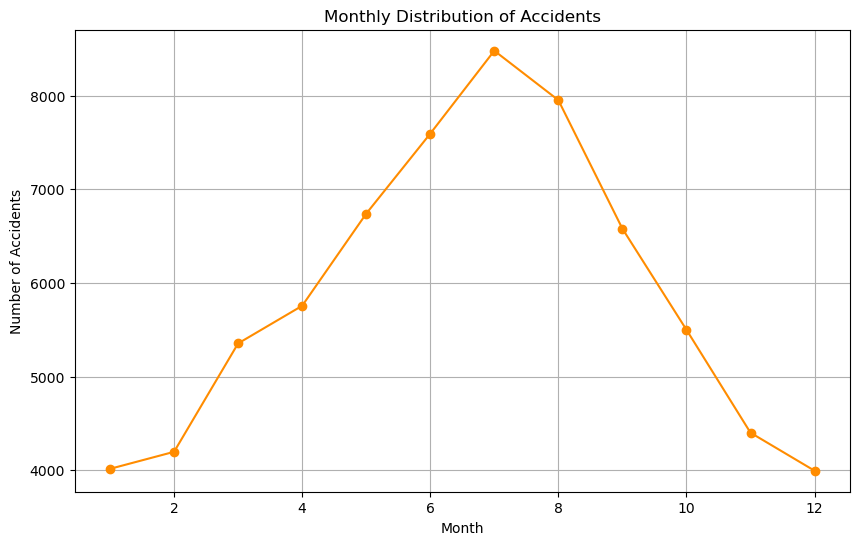

In [51]:
# Group the data by 'Month' and count the number accidents for each month
df_monthly = df.groupby('Month').size()
plt.figure(figsize=(10, 6))

# Plot the data as a line chart
# 'marker' sets the marker style for the data points
# 'color' sets the line color
plt.plot(df_monthly.index, df_monthly.values, marker='o', color='darkorange')

# Set the title of the plot
plt.title('Monthly Distribution of Accidents')

# Set the x-axis label
plt.xlabel('Month')

# Set the y-axis label
plt.ylabel('Number of Accidents')

# Add a grid to the plot for better readability
plt.grid(True)

# Display the plot
plt.show()


### 9. Aircraft Make over Total Fatalities

**Objective:** displaying the top 10 aircraft makes by total fatalities. Here's a step-by-step breakdown :


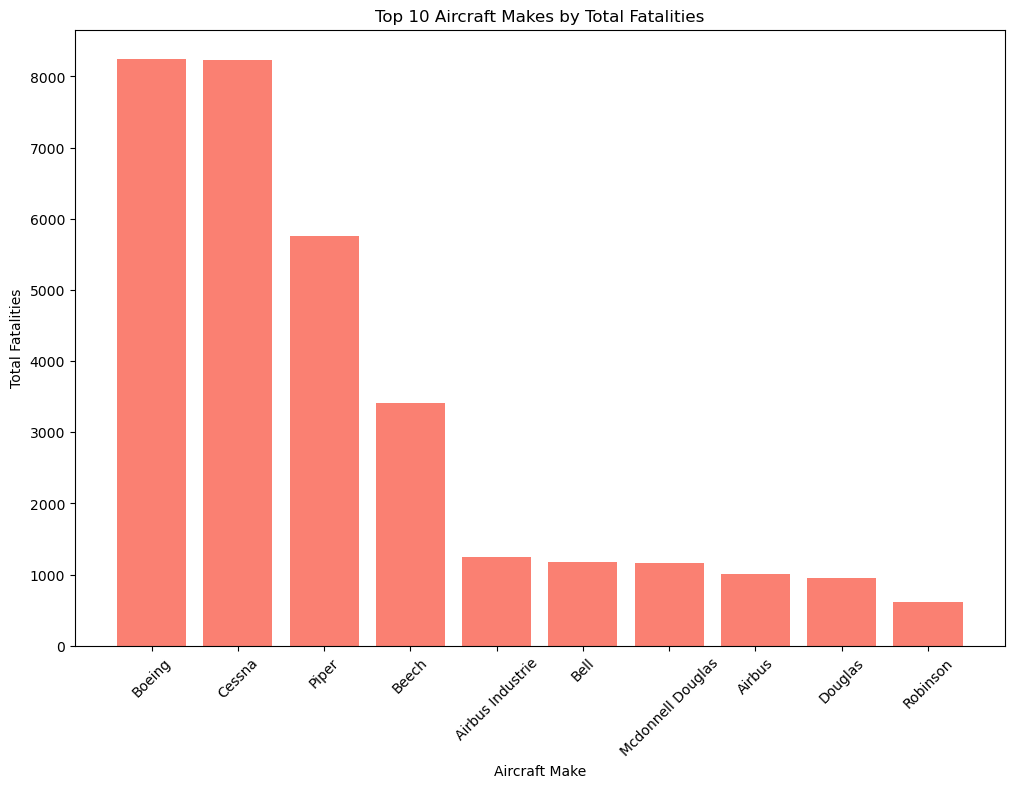

In [52]:
import matplotlib.pyplot as plt

# Group by 'Make' and sum the 'Total.Fatal.Injuries' for each make
make_to_fatalities = df.groupby('Make')['Total.Fatal.Injuries'].sum().reset_index()

# Sort the results by the number of fatalities in descending order
make_to_fatalities = make_to_fatalities.sort_values(by='Total.Fatal.Injuries', ascending=False).head(10)  # Top 10 makes

# Plot the data
plt.figure(figsize=(12, 8))
plt.bar(make_to_fatalities['Make'], make_to_fatalities['Total.Fatal.Injuries'], color='salmon')
plt.title('Top 10 Aircraft Makes by Total Fatalities')
plt.xlabel('Aircraft Make')
plt.ylabel('Total Fatalities')
plt.xticks(rotation=45)
plt.show()

### 10. Analysis of Aircraft Damage Severity by Make

This analysis aims to map the aircraft damage severity and identify the top 10 aircraft makes with the highest damage severity index. We then use a predefined mapping for damage severity, calculate the damage severity index for each make, and visualize the top 10 makes.

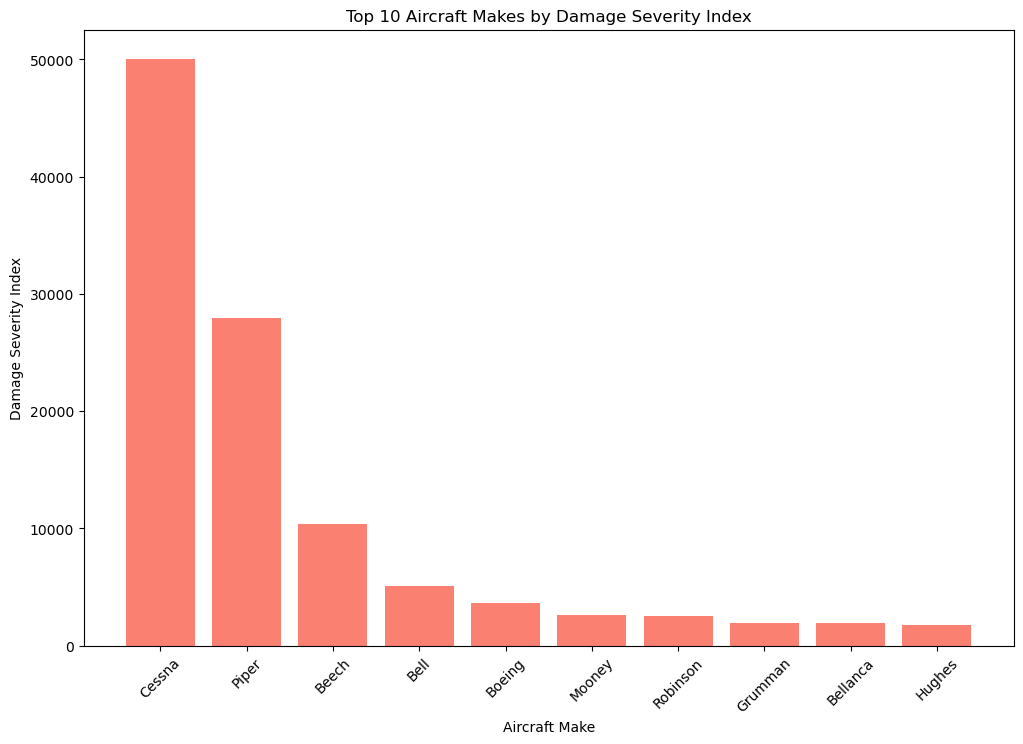

In [53]:
# Define a mapping for damage severity
damage_severity_mapping = {
    'Destroyed': 3,
    'Substantial': 2,
    'Minor': 1,
    'None': 0
}

# Map the 'Aircraft.damage' column to the damage severity index
df['Damage.Severity.Index'] = df['Aircraft.damage'].map(damage_severity_mapping)

# Group by 'Make' and sum the 'Damage.Severity.Index' for each make
make_to_damage_severity = df.groupby('Make')['Damage.Severity.Index'].sum().reset_index()

# Sort the results by the damage severity index in descending order and select the top 10 makes
top_damage_severity_makes = make_to_damage_severity.sort_values(by='Damage.Severity.Index', ascending=False).head(10)

# Plot the data
plt.figure(figsize=(12, 8))
plt.bar(top_damage_severity_makes['Make'], top_damage_severity_makes['Damage.Severity.Index'], color='salmon')
plt.title('Top 10 Aircraft Makes by Damage Severity Index')
plt.xlabel('Aircraft Make')
plt.ylabel('Damage Severity Index')
plt.xticks(rotation=45)
plt.show()

In [54]:
df.to_excel('Analysed_data.xlsx', index=False)

In [55]:
df.columns

Index(['Event.Date', 'Location', 'Country', 'Injury.Severity',
       'Aircraft.damage', 'Aircraft.Category', 'Make', 'Model',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Number.of.Engines', 'Engine.Type',
       'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 'Year',
       'Month', 'Day', 'Total.Injuries', 'Injury.Severity.Index',
       'Damage.Severity.Index'],
      dtype='object')

In [ ]:
df['Make'].unique

<bound method Series.unique of 0                             Piper
1                            Cessna
2                            Boeing
3                              Fuji
4                            Cessna
                    ...            
78269     Grumman American Avn Corp
78270                   Air Tractor
78271                         Piper
78273    American Champion Aircraft
78275                         Piper
Name: Make, Length: 76980, dtype: object>